# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# Data Preview & Data PreProcessin

In [2]:
df = pd.read_csv('/content/Dataset Heart Disease.csv')
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [4]:
df.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
age,0
sex,0
chest pain type,0
resting bps,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0


In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df['target'].unique()

array([0, 1])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


# EDA

In [9]:
describe_numerical = ['age','resting bps' , 'cholesterol' , 'max heart rate','oldpeak']

					>>***** age *****<<


count    1048.000000
mean       53.325382
std         9.397822
min        28.000000
25%        46.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64 



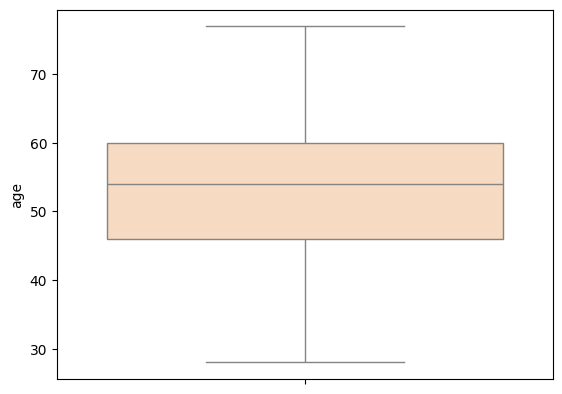

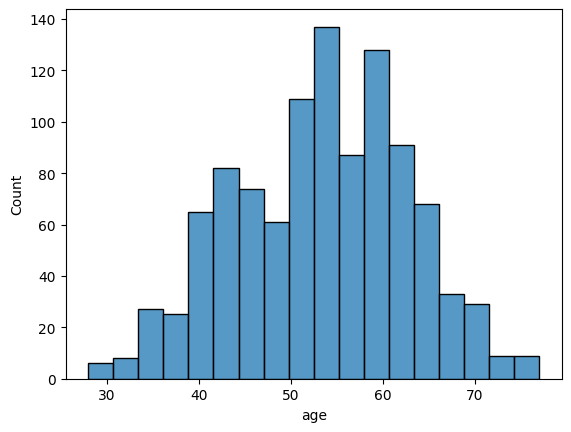

<ipython-input-10-a392eb30a927>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


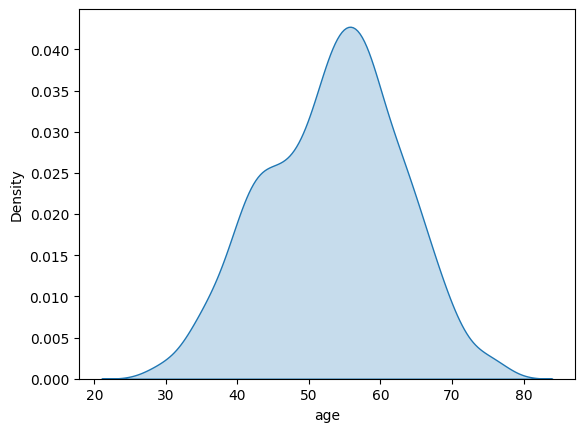






					>>***** sex *****<<




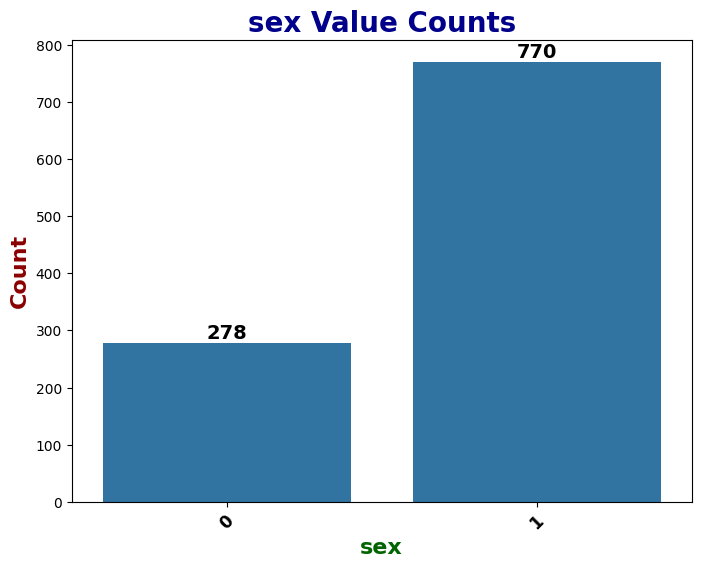






					>>***** chest pain type *****<<




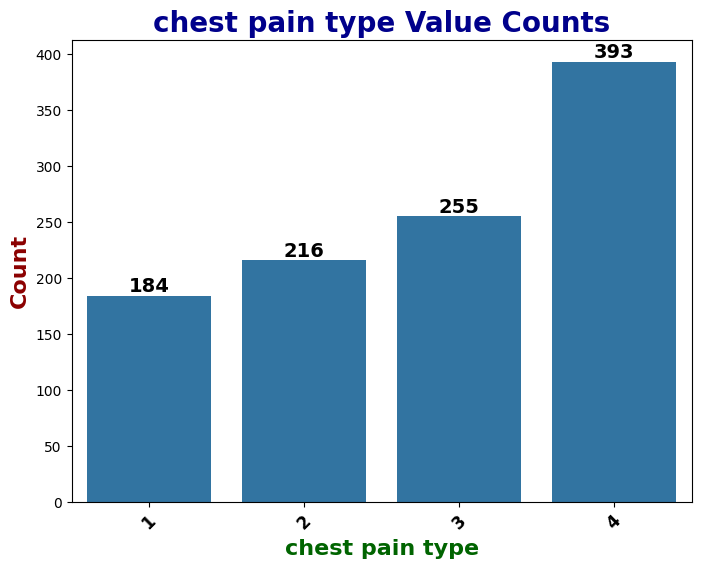






					>>***** resting bps *****<<


count    1048.000000
mean      132.613550
std        17.367605
min        92.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting bps, dtype: float64 



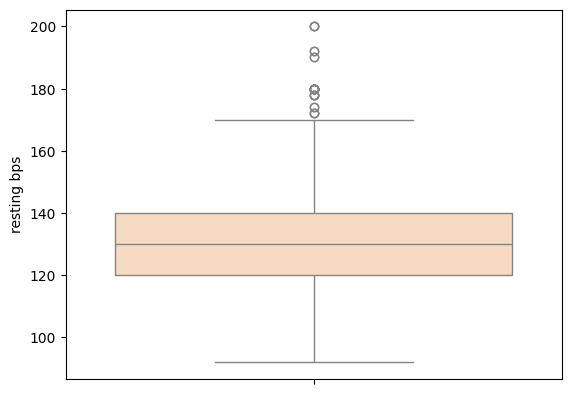

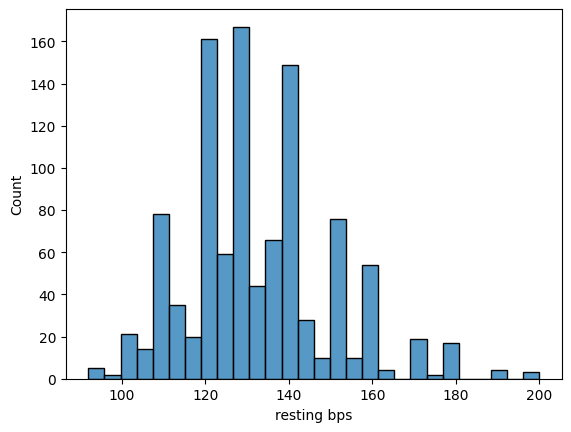

<ipython-input-10-a392eb30a927>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


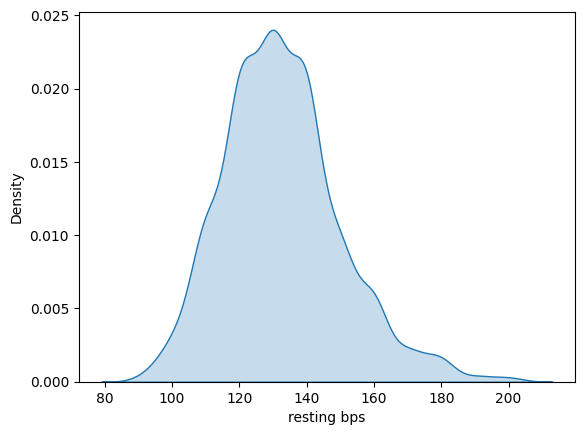


		 Maximum Outlire


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
109,39,1,2,190,241.0,0,0,106,0,0.0,1,0
123,58,0,2,180,393.0,0,0,110,1,1.0,2,1
189,53,1,4,180,285.0,0,1,120,1,1.5,2,1
190,46,1,4,180,280.0,0,1,120,0,0.0,1,0
241,54,1,4,200,198.0,0,0,142,1,2.0,2,1
274,45,0,2,180,295.0,0,0,180,0,0.0,1,0
275,59,1,3,180,213.0,0,0,100,0,0.0,1,0
278,57,0,4,180,347.0,0,1,126,1,0.8,2,0
378,55,1,4,172,260.0,0,0,73,0,2.0,2,1
413,57,1,2,180,285.0,1,1,120,0,0.8,2,1







					>>***** cholesterol *****<<


count    1048.000000
mean      245.172710
std        57.101359
min        85.000000
25%       208.000000
50%       239.000000
75%       275.000000
max       603.000000
Name: cholesterol, dtype: float64 



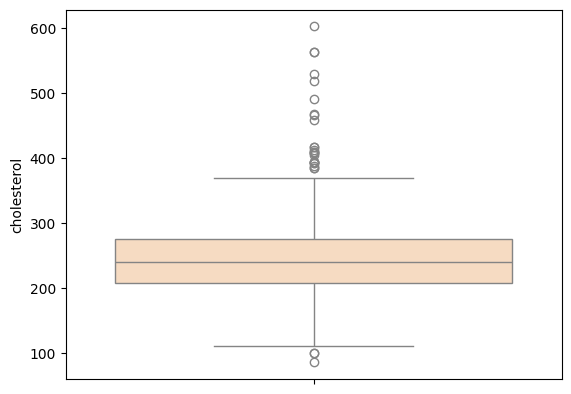

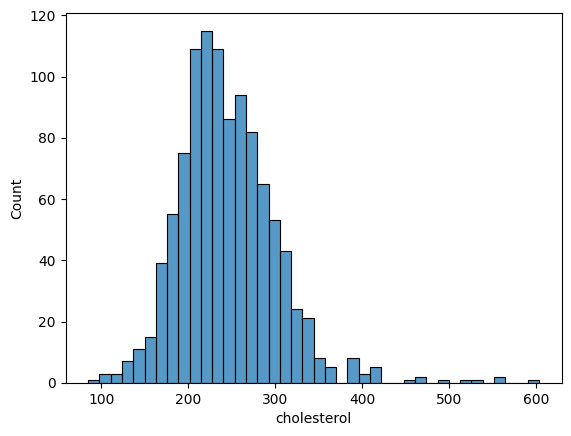

<ipython-input-10-a392eb30a927>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


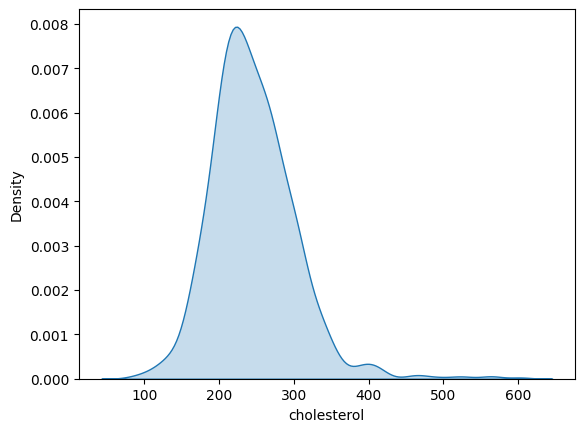


		 Maximum Outlire


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
28,53,0,2,113,468.0,0,0,127,0,0.0,1,0
30,53,1,3,145,518.0,0,0,130,0,0.0,2,1
69,44,1,4,150,412.0,0,0,170,0,0.0,1,0
76,32,1,4,118,529.0,0,0,130,0,0.0,2,1
102,40,0,4,150,392.0,0,0,130,0,2.0,2,1
103,40,1,4,120,466.0,1,0,152,1,1.0,2,1
123,58,0,2,180,393.0,0,0,110,1,1.0,2,1
132,56,1,4,170,388.0,0,1,122,1,2.0,2,1
149,54,1,4,130,603.0,1,0,125,1,1.0,2,1
182,52,1,4,140,404.0,0,0,124,1,2.0,2,1


		 Minimum Outlire


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
78,52,1,2,140,100.0,0,0,138,1,0.0,1,0
98,56,1,4,120,85.0,0,0,140,0,0.0,1,0
305,56,1,4,120,100.0,0,0,120,1,1.5,2,1







					>>***** fasting blood sugar *****<<




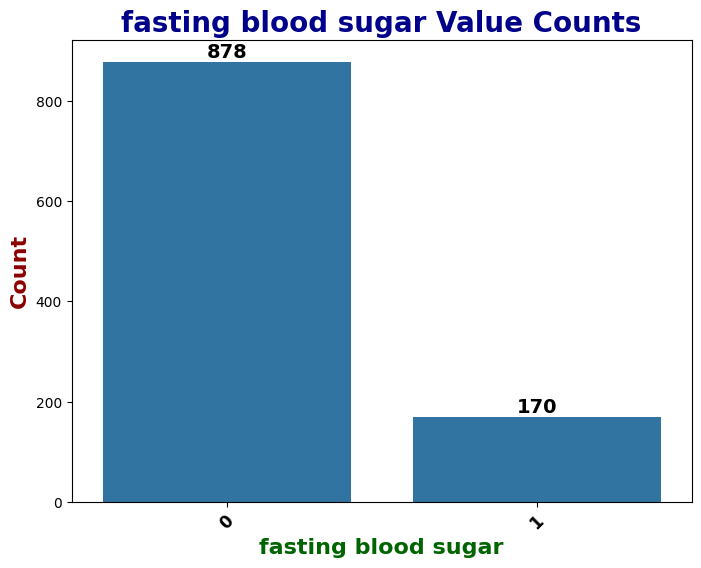






					>>***** resting ecg *****<<




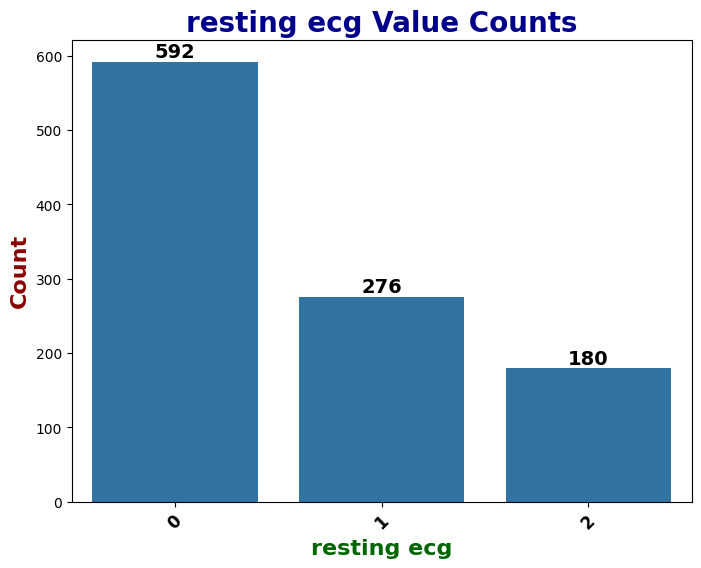






					>>***** max heart rate *****<<


count    1048.000000
mean      142.918893
std        24.427115
min        69.000000
25%       125.000000
50%       144.000000
75%       162.000000
max       202.000000
Name: max heart rate, dtype: float64 



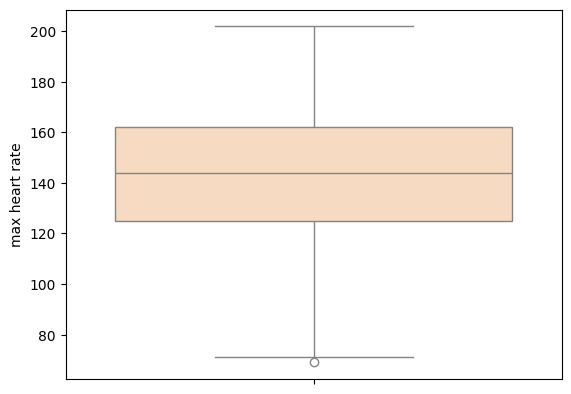

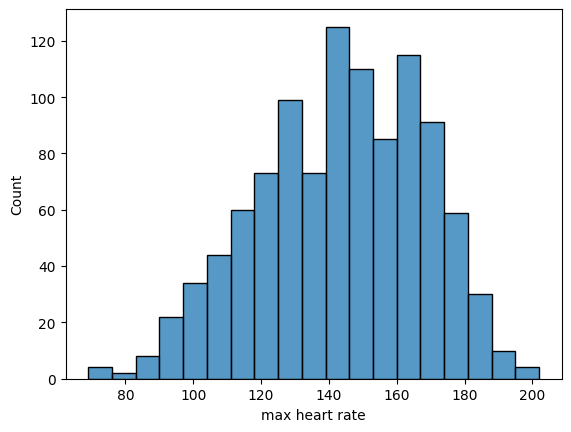

<ipython-input-10-a392eb30a927>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


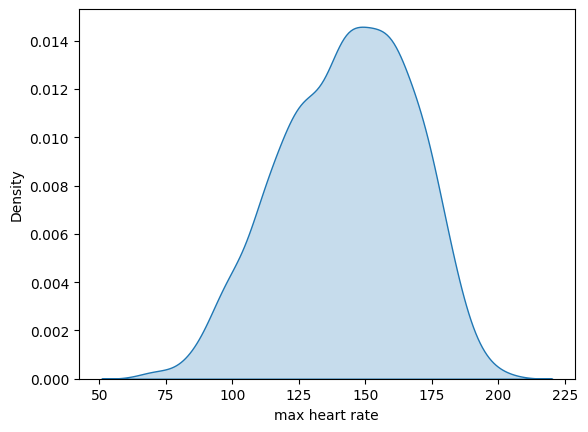

		 Minimum Outlire


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
330,58,1,4,132,458.0,1,0,69,0,1.0,3,0







					>>***** exercise angina *****<<




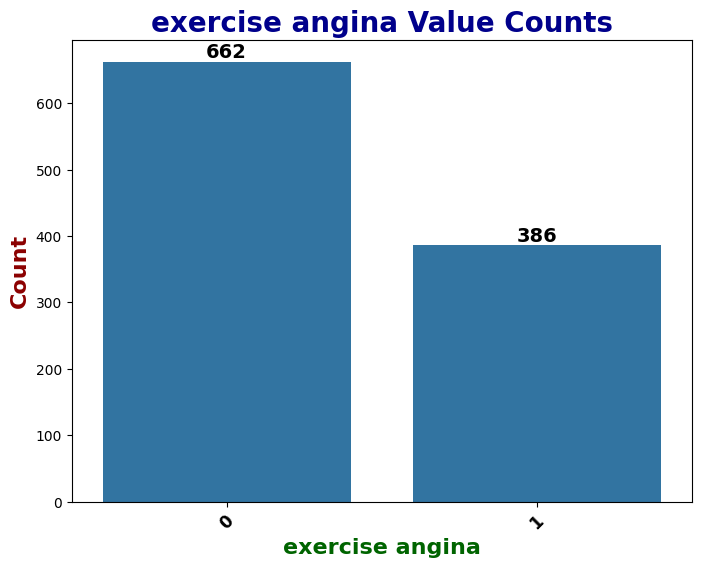






					>>***** oldpeak *****<<


count    1048.000000
mean        0.942366
std         1.100429
min        -0.100000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64 



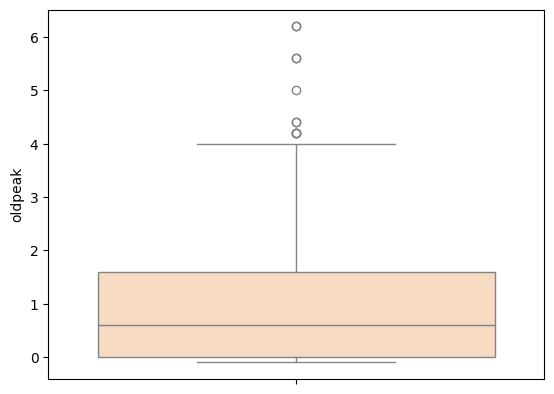

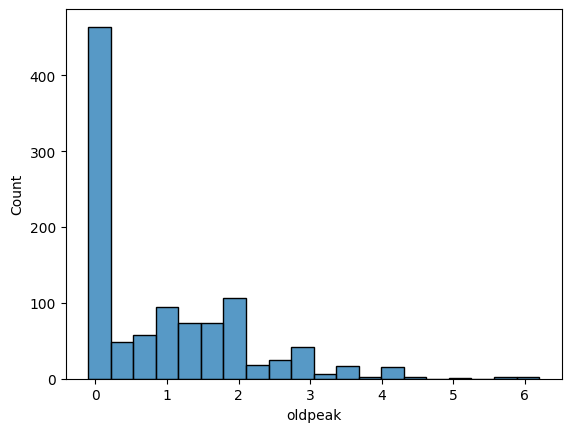

<ipython-input-10-a392eb30a927>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


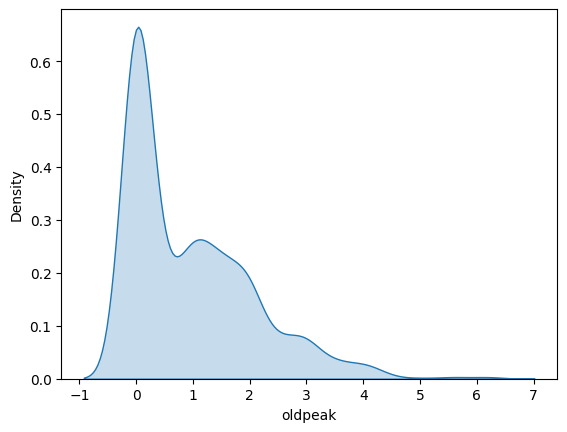


		 Maximum Outlire


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
166,50,1,4,140,231.0,0,1,140,1,5.0,2,1
530,59,1,1,178,270.0,0,2,145,0,4.2,3,0
599,55,1,4,140,217.0,0,0,111,1,5.6,3,1
619,51,1,4,140,298.0,0,0,122,1,4.2,2,1
678,62,0,4,160,164.0,0,2,145,0,6.2,3,1
728,58,1,4,114,318.0,0,1,140,0,4.4,3,1
752,58,1,1,114,318.0,0,2,140,0,4.4,0,0
759,51,1,1,140,298.0,0,1,122,1,4.2,1,0
797,55,1,1,140,217.0,0,1,111,1,5.6,0,0
809,62,0,1,160,164.0,0,0,145,0,6.2,0,0







					>>***** ST slope *****<<




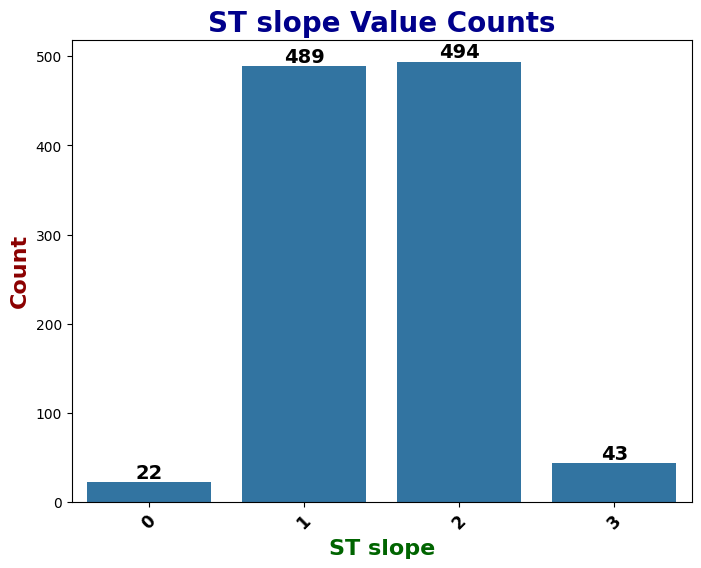






					>>***** target *****<<




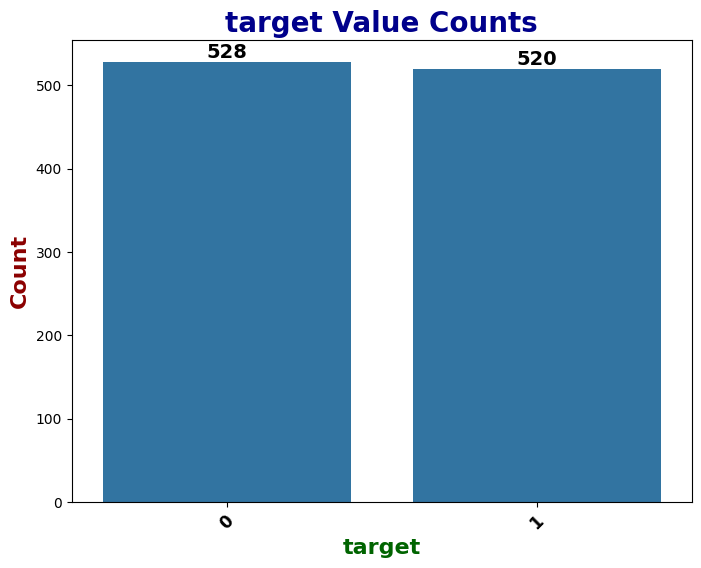

In [10]:
from termcolor import colored
for i in df:
    print(colored('\t\t\t\t\t>>***** '+i+' *****<<\n\n','red'))
    if i in describe_numerical:

        # Details and illustrations

        print(df[i].describe(),'\n')
        sns.boxplot( df[i], color='peachpuff')
        plt.show()
        sns.histplot(df[i])
        plt.show()
        sns.kdeplot(df[i], shade=True)
        plt.show()

        # Finding the outliers

        q75,q25= np.percentile(df[i],[75,25])
        intr_qr=q75-q25
        max=q75+(1.5*intr_qr)
        min=q25-(1.5*intr_qr)

        # Show outliers, if any

        if df[df[i]>max].shape[0] != 0:
            print(colored('\n\t\t Maximum Outlire','green'))
            display(df[df[i]>max])
        if df[df[i]<min].shape[0] != 0:
            print(colored('\t\t Minimum Outlire','green'))
            display(df[df[i]<min])


    else:
        plt.figure(figsize=(8, 6))
        plt.title(i+' Value Counts', fontsize=20, fontweight='bold', color='darkblue')

        plt.xlabel(i, fontsize=16, fontweight='bold', color='darkgreen')

        plt.ylabel('Count', fontsize=16, fontweight='bold', color='darkred')


        plt.xticks(rotation=45, fontsize=12, fontweight='bold')
        p = sns.barplot( x=df[i].value_counts().keys() , y=df[i].value_counts().values )
        p.bar_label(p.containers[0], fontsize=14 , fontweight='bold' );

        plt.show()

    print('\n\n\n\n')

In [11]:
df.corr()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,-0.004727,0.054615,0.262620,0.096891,0.206304,0.155920,-0.365829,0.199733,0.265204,0.139789,0.158027
sex,-0.004727,1.000000,0.108897,0.008786,-0.131711,0.082642,-0.017819,-0.135492,0.181000,0.111965,0.095621,0.112131
chest pain type,0.054615,0.108897,1.000000,0.056790,0.025628,0.062464,0.092742,-0.221201,0.198775,0.104195,0.301401,0.366581
resting bps,0.262620,0.008786,0.056790,1.000000,0.102831,0.175602,0.027722,-0.108924,0.136427,0.194640,0.065850,0.077941
cholesterol,0.096891,-0.131711,0.025628,0.102831,1.000000,0.042886,0.027417,-0.013427,0.080009,0.056669,0.057395,0.056216
fasting blood sugar,0.206304,0.082642,0.062464,0.175602,0.042886,1.000000,0.091031,-0.080169,0.087928,0.039059,0.091056,0.106897
resting ecg,0.155920,-0.017819,0.092742,0.027722,0.027417,0.091031,1.000000,0.016012,0.027868,0.079771,0.113381,0.111132
max heart rate,-0.365829,-0.135492,-0.221201,-0.108924,-0.013427,-0.080169,0.016012,1.000000,-0.393994,-0.268025,-0.163418,-0.146000
exercise angina,0.199733,0.181000,0.198775,0.136427,0.080009,0.087928,0.027868,-0.393994,1.000000,0.407455,0.270392,0.270920
oldpeak,0.265204,0.111965,0.104195,0.194640,0.056669,0.039059,0.079771,-0.268025,0.407455,1.000000,0.234889,0.217183


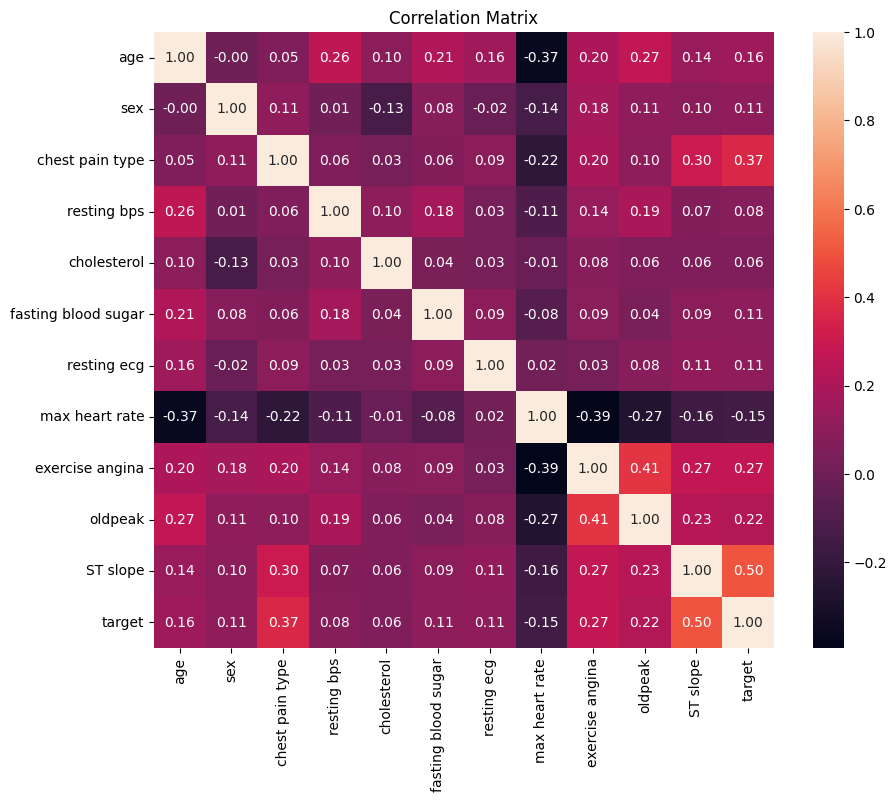

In [12]:
corr_matrix = df.corr()

# Visualisasi korelasi matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

In [13]:
correlation_matrix = df.corr()

# Tentukan threshold untuk korelasi dengan target
threshold = 0.2

# Pilih fitur dengan korelasi absolut terhadap target lebih besar dari threshold
selected_features = correlation_matrix['target'][correlation_matrix['target'].abs() > threshold].index.tolist()

# Hilangkan target dari daftar fitur
selected_features.remove('target')

print("Fitur terpilih berdasarkan korelasi:", selected_features)

# Data dengan fitur yang sudah dipilih
df_selected = df[selected_features + ['target']]

Fitur terpilih berdasarkan korelasi: ['chest pain type', 'exercise angina', 'oldpeak', 'ST slope']


In [14]:
# Pisahkan fitur (X) dan label (y)
X = df_selected.drop(columns=['target'])
y = df_selected['target']

In [15]:


# Bagi data (misalnya, 80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (838, 4)
Data uji: (210, 4)


In [16]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Data Modelling & Evaluation

AdaBoost Akurasi: 0.7857142857142857
AdaBoost Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       104
           1       0.77      0.83      0.80       106

    accuracy                           0.79       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.79      0.79      0.79       210



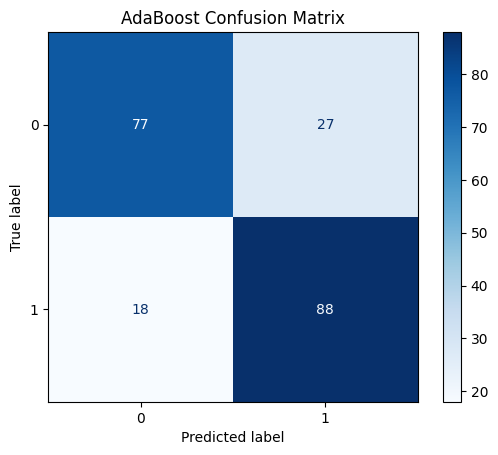

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi dan latih model
model_ada = AdaBoostClassifier(random_state=42, n_estimators=100)
model_ada.fit(X_train, y_train)

# Prediksi
y_pred_ada = model_ada.predict(X_test)

# Evaluasi
print("AdaBoost Akurasi:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Laporan Klasifikasi:\n", classification_report(y_test, y_pred_ada))

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=model_ada.classes_)
disp_ada.plot(cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.show()

XGBoost Akurasi: 0.7619047619047619
XGBoost Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       104
           1       0.73      0.83      0.78       106

    accuracy                           0.76       210
   macro avg       0.77      0.76      0.76       210
weighted avg       0.77      0.76      0.76       210



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:36:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


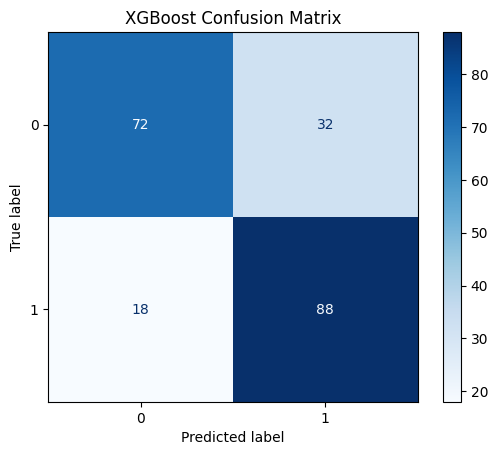

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi dan latih model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Prediksi
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi
print("XGBoost Akurasi:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Laporan Klasifikasi:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


<ipython-input-19-66eb2224191b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Algorithm', y='Accuracy', palette='coolwarm')


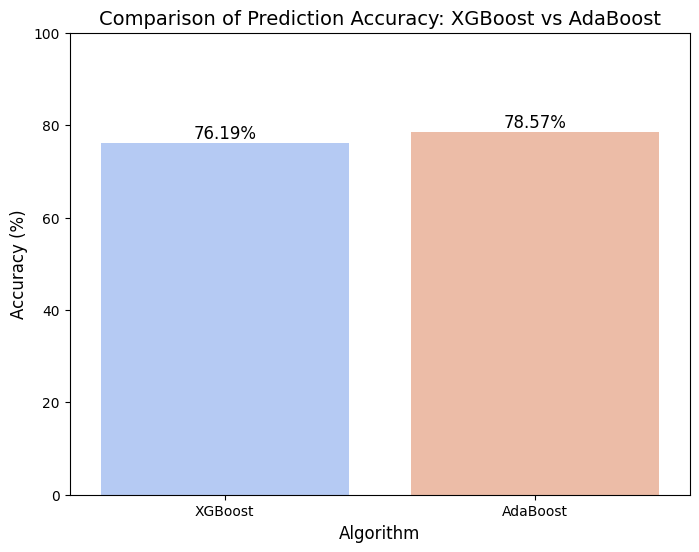

In [19]:
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung akurasi untuk masing-masing algoritma
xgboost_accuracy = accuracy_score(y_test, y_pred_xgb) * 100
adaboost_accuracy = accuracy_score(y_test, y_pred_ada) * 100

# Membuat DataFrame untuk menyimpan akurasi
comparison_df = pd.DataFrame({
    'Algorithm': ['XGBoost', 'AdaBoost'],
    'Accuracy': [xgboost_accuracy, adaboost_accuracy]
})

# Membuat bar plot untuk perbandingan akurasi
plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_df, x='Algorithm', y='Accuracy', palette='coolwarm')

# Menambahkan label akurasi pada setiap bar
for index, row in comparison_df.iterrows():
    plt.text(index, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12)

# Menambahkan detail pada plot
plt.title('Comparison of Prediction Accuracy: XGBoost vs AdaBoost', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)  # Skala akurasi dari 0 hingga 100
plt.show()
